<a href="https://colab.research.google.com/github/VericaL98/PPPO_2021/blob/main/IT6_2017_Verica_Lulic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Sadržaj**

1. Uvod 
2. Objašnjenje zadatka 
3. Objašnjenje algoritma za realizaciju zadatka 
4. Realizacija zadatka 
5. Zaključak 
6. Reference 










**Uvod**

Klasifikacija je zadatak nadgledanog mašinskog učenja čiji je cilj predvidjeti klasne oznake novih instanci na osnovu ranijih opažanja. Znači, obučavamo model koristeći trening podatake i tako obučen model koristimo za predviđanje novih, do tada neviđenih podataka. Termin „nadgledano učenje“ odnosi se na skup trening primjera (ulaznih podataka) gdje su signali željenog izlaza (oznake) već poznati.

Primjer klasifikacije sa kojim se susrećemo u svakodnevnom životu jeste sistem elektronske pošte koji ima mogućnost automatskog otkrivanja neželjenih poruka. To znači da sistem analizira sve dolazne poruke i označava ih kao spam ili ne-spam, čak i mi, kao krajnji korisnici, imamo mogućnost da ručno označimo poruke kao neželjene, kako bismo poboljšali sposobnost otkrivanja spam-a.

Ovaj primjer klasifikacije spada u binarnu klasifikaciju jer postoje samo dvije klase 'spam' i 'nije spam', a pored nje imamo još tri vrste klasifikacije: 'Multi-Class' kada postoje više od dvije klase, 'Multi-Label' kada jedan objekat pripada jednoj ili više klasa i 'Unbalanced' kada je broj primjera u svakoj klasi nejednako raspoređen.

Klasifikacija fotografija predstavlja dodjeljivanje najvjerovatnije kategorije kojoj pripada fotogafija iz nekog skupa fiksnih kategorija.

Postoje dva tipa klasifikatora fotografija:

1. prvi tip je klasifikacija pomoću karakteristika koje su uočene na fotografijama

2. drugi tip je kada se duboka neuronska mreža obučava za klasifikovanje fotografija

Klasifikacija fotografija sastoji se od dvije faze:

1. treniranje-algoritmu za klasifikaciju se pružaju ulazi za koje je poznata oznaka klase i koristeći te ulaze obučava se model
2. testiranje-kada je završen trening, naučeni model se koristi za predviđanje klasa novih, do tada neviđenih ulaza

**Objašnjenje zadatka**

Osnovna ideja zadatka jeste da se na osnovu različitih fotografija pasa kreira model koji će da ih klasifikuje na osnovu toga kojoj rasi pripadaju.

Dataset sadrži:
1. test folder koji zapravo predstavlja skup podataka za testiranje 
2. train folder koji predstavlja skup podataka za trening 
3. labels.csv fajl (u njemu se nalaze kolone id koji predstavlja jedinstvenu oznaku za svaku fotografiju i breed koji predstavlja naziv rase)
4. sample_submission.csv (primjer kako treba da izgleda format fajla koji će se dobiti kao rješenje zadatka)



**Objašnjene algoritma za realizaciju zadatka**

Za realizaciju zadatka je korišćen SGD (Stochastic gradient descent) algoritam.

**Gradijentni spust**


* Iterativni metod za minimizaciju funkcije 
* U svakom iteraciji se mijenjaju težine, tako da se funkcija cijene smanjuje 
* Gradijent je vektor u smjeru u kojem funkcija najbrže raste 
 - Elementi gradijenta su parcijalni izvodi funkcije cijene po težinama mreže 
 - Treba da se krećemo u smjeru negativnog gradijenta 

**Stohastički gradijentni spust**

* Vrijednost funkcije cijene na trening skupu je srednja vrijednost funkcija cijene za pojedine uzorke 
* Vrijednost gradijenta na trening skupu je srednja vrijednost vrijednosti gradijenata za pojedine uzorke 
 - Dugo izračunavanje - sporo obučavanje 
* Aproksimacija vrijednosti gradijenta na podskupu trening uzoraka - mini-batch 
 - Biraju se slučajno 
 - Nakon svakog mini-batcha se ažuriraju vrijednosti težina 
 - Ponavlja se sve dok se ne iscrpe svi trening uzorci - epoha obučavanja 
 -Ubrzava obučavanje 


Jedna od izrazitih prednosti korišćenja Stochastic Gradient Descent-a je ta što proračune obavlja brže od gradient descent-a i  batch gradient descent-a. Takođe, na masovnim skupovima podataka, stochastic gradient descent može brže da konvergira jer češće vrši ažuriranja. 



**Realizacija zadatka**

Na samom početku, importovane su sve biblioteke koje će biti potrebne za realizaciju projekta.


* NumPy (Numerical Python) je Pajtonova biblioteka otvorenog koda koja predstavlja univerzalni standard za rad sa numeričkim podacima u Pajtonu. Biblioteka sadrži višedimenzionalne nizove podataka i matrice i omogućava izvođenje matematičkih operacija nad njima. NumPy garantuje efikasne proračune i isporučuje ogromnu biblioteku matematičkih funkcija na visokom nivou.


* Pandas je biblioteka napisana za Pajton kako bi omogućila manipulaciju podacima i analizu istih. Pandas omogućava importovanje podataka u različitim formatima kao što su CSV, JSON, SQL, Excel. Takođe, omogućava i različite manipulacije podacima kao što su spajanje, selektovanje, promjena oblika, čišćenje podataka.



*  OS modul u Pajtonu pruža funkcije za interakciju sa operativnim sistemom. OS spada u standardne pomoćne module Pajtona. Funkcije koje pruža OS modul nam omogućavaju da radimo nad osnovnim zadacima operativnog sistema, bez obzira na to da li se radi o Windows platformi, Macintosh ili Linux.






In [ ]:

import numpy as np 
import pandas as pd 

import os



* matplotlib.pyplot je skup funkcija komandnog stila koje čine da matplotlib radi poput MATLABA. Svaka pyplot funkcija vrši neku promjenu figure: npr. kreira figuru, stvara površinu za iscrtavanje na figuri, iscrtava neke linije na površini za iscrtavanje, ukrašava grafikon oznakama...


* Image modul pruža klasu sa istim imenom koja se koristi za predstavljanje PIL slike. Modul takođe pruža niz fabričkih funkcija, uključujući funkcije za učitavanje slika iz datoteka i za kreiranje novih slika


* Kreiranje PyTorch Dataset-a i upravljanje njime pomoću DataLoader-a održava vaše podatke upravljivim odnosno lakšim za rukovanje i pomaže da se pojednostavi proces mašinskog učenja. Dataset skladišti sve vaše podatke, a DataLoader pomaže da se iterira kroz podatke, služi za transformaciju podataka i još mnogo toga



* Podpaket modela sadrži definicije modela za rješavanje različitih zadataka, uključujući: klasifikaciju slike, semantičku segmentaciju po pikselima, detekciju objekata, segmentaciju instance, detekciju ključne tačke osobe i video klasifikaciju


* PyTorch pruža modul torch.nn koji nam pomaže u stvaranju i obučavanju neuronske mreže 


* TorchVision, PyTorch-ov computer vision paket ima jednostavan API za predobradu slike u svom torchvision.transforms modulu. Transformacije su uobičajene transformacije slike. Mogu se povezati zajedno pomoću Compose. Većina klasa transformacija ima ekvivalentnu funkciju: funkcionalne transformacije daju kontrolu nad transformacijama, što je korisno ako se mora izgraditi složeniji tok transformacije 



* torch.optim je paket koji implementira različite algoritme optimizacije 

















In [ ]:

import matplotlib.pyplot as plt
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader, SubsetRandomSampler
import torchvision.models as models
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim

class CreateDataset(Dataset): Na ovaj način kreiramo klasu koja se naziva CreateDataset koja može biti pozvana kad god to želimo. U ovu klasu se prosljeđuje skup podataka koji ćemo da importujemo.

Prilagođena klasa skupa podataka mora implementirati tri funkcije: __init__, __len__ i __getitem__. 

def __init__(self, img_dir, dataframe, transform=None): Kada se inicijalizuje klasa, importuju se promjenljive. U ovom slučaju, promjenljive se nazivaju img_dir i dataframe kako bi odgovarale podacima koji će biti dodati. Takođe, u većini primjera se vidi da je transform=None u __init__() i ovo se koristi kako bi se primjenila torchvision transforms na vaše podatke/sliku.

self.labels_frame = dataframe, self.img_dir = img_dir, self.transform = transform: Na ovaj način se sada ove promljenljive mogu koristiti u funkcijama unutar klase

def __len__(self): Ova funkcija samo vraća dužinu od labels_frame kada se pozove. Npr. ako bismo imali skup podataka koji sadrži 5 labels_frame, onda bi se vratio cijeli broj 5.

def __getitem__(self, idx): Ova funkcija koristi PyTorch-ov Dataset modul za dobijanje uzorka i za konstruisanje skupa podataka. Kada se inicijalizuje, on će proći kroz ovu funkciju stvarajući uzorak iz svake instance u skupu podataka. 

Idx koji predstavlja drugi parametar funkcije, ovaj broj je zapravo instanca podataka kroz koju će skup podataka prolaziti. Mi koristimo prethodno pomenute promjenljive self.labels_frame i self.img_dir sa proslijeđenom promjenljivom idx kako bismo dobili trenutnu instancu podataka. 

Img_name promjenljiva predstavlja id koji je zapravo jedinstvena oznaka za svaku fotografiju sa ekstenzijom jpg. Image promjenljiva će da vrati tu sliku koja odgovara tom id-iju, a label promjenljiva vraća naziv rase za taj id slike i tu sliku. Na taj način se kreira dataset i ova funkcija vraća sliku i naziv rase koja odgovara toj slici.

In [ ]:
class CreateDataset(Dataset):
    
    def __init__(self, img_dir, dataframe, transform=None):
        self.labels_frame = dataframe
        self.img_dir = img_dir
        self.transform = transform
        
    def __len__(self):
        return len(self.labels_frame)
    
    def __getitem__(self, idx):
        img_name = os.path.join(self.img_dir, self.labels_frame.id[idx]) + ".jpg"
        image = Image.open(img_name)
        label = self.labels_frame.target[idx]
        
        if self.transform:
            image = self.transform(image)
        
        return [image, label]
    



Sljedeći korak jeste povezivanje Google Colab-a sa Google Drive-om kako bi se omogućilo importovanje fajlova koji su dobijeni u sklopu projektnog zadatka.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/My Drive"

 apdevExamples1.zip
 apdevFlightsWs.zip
'Apr 9, 09.18sonja rsubp3_prvidio.mp3'
'Apr 9, 10.01rsubp3_drugiDio.mp3'
 bpmn
'Colab Notebooks'
 DataWeave.zip
 LulicVerica_080220_BHM_8060_01_KljucPosete76049.PDF.gdoc
'Nov 12, 10.30sonja-predavanje 5.mp3'
'Nov 5, 10.31sonja-predavanje 4.mp3'
'Oct 15, 10.31sonja-predavanje 1.1.mp3'
'Oct 15, 11.29sonja-predavanje 1.2.mp3'
'Oct 29, 10.31sonja-predavanje 3.mp3'
 PEKARA-Verica-Lulic-IT6-2017.zip
'Processing records.zip'
 projektovanje.gdoc
 slika
 training4AmericanWs.zip
 TriggeringFlows.zip
'Untitled Diagram (10).drawio'
'Untitled Diagram (1).drawio'
'Untitled Diagram (2).drawio'
'Untitled Diagram (3).drawio'
'Untitled Diagram (4).drawio'
'Untitled Diagram (5).drawio'
'Untitled Diagram (6).drawio'
'Untitled Diagram (7).drawio'
'Untitled Diagram (8).drawio'
'Untitled Diagram (9).drawio'
'Untitled Diagram.drawio'
'upravljanje odnosima sa korisnicima'
 UseCase-Taksi_prevoz.drawio


Ovdje prvo učitavamo csv fajlove, labels.csv i sample_submission.csv.

DataFrame je dvodimenzionalna struktura podataka koja omogućava smještanje prethodno dobijenih podataka u kolone i test_frame će da sadrži 10357 redova i jednu kolonu koja predstavlja id, odnosno jedinstvenu oznaku za svaku fotografiju.

Submission_file sadrži 10357 redova i 121 kolonu, od kojih prva kolona predstavlja id, a ostale kolone su nazivi rasa pasa.

Funkcija range() vraća niz brojeva koji počinju od 0 po defaultu i povećavaju se za jedan po defaultu i zaustavlja se prije navedenog broja, pa tako code = range(len(label_names)) vraća range(0, 10357). 

Dict() funkcija kreira rječnik. Rječnik je kolekcija koja je neuređena, promjenljiva i indeksirana.

Zip() funkcija vraća zip objekat koji je iterator torki, gdje se prva stavka u svakom proslijeđenom iteratoru upariva zajedno, zatim se druga stavka u svakom proslijeđenom iteratoru upariva zajedno itd.
Ako proslijeđeni iteratori imaju različite dužine, iterator sa najmanje stavki odlučuje o dužini novog iteratora.

Transformacije su uobičajene transformacije slike. Mogu se povezati zajedno pomoću Compose. 

Kao što sam već rekla, dataset sadrži train folder koji predstavlja skup podataka za trening i test folder koji predstavlja skup podataka za testiranje.

 I u nastavku, samo se kreiraju dva dataset-a, jednom se prosljeđuje skup podataka za trening, a drugom skup podataka za testiranje. 




shetland_sheepdog
113


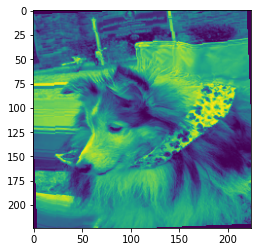

In [ ]:
# Read labels file
dataframe = pd.read_csv('/content/drive/My Drive/Colab Notebooks/#6/labels.csv')

label_names = pd.read_csv('/content/drive/My Drive/Colab Notebooks/#6/sample_submission.csv')

test_frame = pd.DataFrame(data=label_names['id'])
test_frame['target'] = label_names['id']

labels = dataframe['breed']

submission_file = pd.DataFrame(index=label_names.index, columns=label_names.keys())
submission_file['id'] = label_names['id']

label_names.drop(['id'], axis=1, inplace=True)

code = range(len(label_names))

breed_to_code = dict(zip(label_names, code))

code_to_breed = dict(zip(code, label_names))

dataframe['target'] =  [breed_to_code[x] for x in dataframe.breed]
train_dir = '/content/drive/My Drive/Colab Notebooks/#6/train'
test_dir = '/content/drive/My Drive/Colab Notebooks/#6/test'

train_transform = transforms.Compose([transforms.Resize((256,256)),
                                      transforms.CenterCrop(224),
                                transforms.RandomHorizontalFlip(),
                                transforms.RandomRotation(5),
                                        transforms.ToTensor(),
                                         transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])])

train_data = CreateDataset(train_dir, dataframe, train_transform)

test_transform = transforms.Compose([transforms.Resize((256,256)),
                                    transforms.CenterCrop(224),
                                    transforms.ToTensor(),
                                    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                         std=[0.229, 0.224, 0.225])])

test_data = CreateDataset(test_dir, test_frame, test_transform)

plt.imshow(train_data[10][0][0])
print(code_to_breed[train_data[10][1]])

print(train_data[11][1]) 




Batch size definiše broj uzoraka koji će se širiti kroz mrežu.
Na primjer, recimo da imamo 1050 uzoraka za obuku odnosno trening i želimo da podesimo veličinu batch_size = 100. Algoritam uzima prvih 100 uzoraka (od 1 do 100) iz skupa podataka za trening i obučava mrežu. Zatim, uzima drugih 100 uzoraka (od 101 do 200) i ponovo obučava mrežu. Ovu proceduru možemo nastaviti sve dok ne proširimo sve uzorke kroz mrežu. U našem primjeru batch_size je podešen na 64.

Kada je num_workers > 0, samo će ovi workers-i obuhvatiti podatke, glavni proces neće. Kada je num_workers = 2, tada imamo najviše 2 workers-a koji istovremeno stavljaju podatke u RAM, a ne 3. Mi smo ovdje stavili da je num_workers = 0 i to je broj tredova za trening, dakle nećemo imati nikakav paralelizam. 

Takođe, uzela sam 20% podataka za validaciju i 80% podataka za trening.

Ovdje se takođe koristi SubsetRandomSampler kako bi se skup podataka podijelio na podskupove za trening, validaciju i testiranje. 

Za učitavanje podataka u PyTorch-u se koristi klasa torch.utils.data.DataLoader. 

**Argumenti konstruktora DataLoader-a su:**

DataLoader(dataset, batch_size=1, shuffle=False, sampler=None,
           batch_sampler=None, num_workers=0, collate_fn=None,
           pin_memory=False, drop_last=False, timeout=0,
           worker_init_fn=None, *, prefetch_factor=2,
           persistent_workers=False)

In [ ]:
# Specify data loaders

batch_size = 64
num_workers = 0
    
# obtain training indices that will be used for validation
valid_size = 0.2
num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))

split01 = int(np.floor(0.1 * num_train))
train_idx, valid_idx, test_idx = indices[split:], indices[:split01], indices[split01:split]

# define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)
test_sampler = SubsetRandomSampler(test_idx)

train_loader = DataLoader(train_data, batch_size=batch_size, sampler=train_sampler, num_workers=num_workers)
test_loader = DataLoader(train_data, batch_size=batch_size, sampler=test_sampler, num_workers=num_workers)
valid_loader = DataLoader(train_data, batch_size=batch_size, sampler=valid_sampler, num_workers=num_workers)
loaders_transfer = {'train':train_loader,'test':test_loader,'valid':valid_loader}

Torch.cuda - Ovaj paket dodaje podršku za tipove CUDA tenzora, koji implementiraju istu funkcionalnost baš kao i CPU tenzori, ali za računanje koriste GPUs.
Takođe, koristi se torch.cuda.is_available() kako biste provjerili da li vaš sistem podržava CUDA.

Sada se  koristi tzv. transfer learning i u nastavku će biti objašnjeno šta to zapravo znači.
Što više različitih problema rješavamo, to smo bolji u prenošenju tog znanja za rješavanje novog problema. I sad se pitamo šta ako postoji način da se ista tehnika primjeni za rješavanje problema klasifikacije, regresije ili grupisanja. Transfer learning je tehnika pomoću koje možemo da koristimo model weights koje su obučene na standardnim skupovima podataka kao što su ImageNet kako bismo poboljšali efikasnost našeg zadatka. 

Potrebno je da specificiramo arhitekturu koju ćemo koristiti i to je VGG arhitektura. Postoje dva modela koja su dostupna u VGG, a to je VGG-16 i VGG-19. Ovdje se u zadatku koristi VGG-16. VGG-16 ima tri layer-a: Convolution layer, Pooling layer i Fully Connected. 

for param in model_transfer.features.parameters(): I sad ovdje kaže, kroz taj model prođi kroz sve njegove parametre, a parametri su weights i biases.

param.requires_grad = False – U pytorchu ima ovaj atribut requires_grad i to znači da svaki put kada se radi back propagation da mi računa one parcijalne izvode i ja ovdje kažem ne računaj, znači zamrzni sve parametre, nemoj ih update-ovati, ne diraj ih i poslije ću samo da dodam svoj layer koji ću ja da treniram.
U suštini, to mi samo kaže da uzimam neki model koji je već istreniran i njega ja neću mijenjati, ostaviću ga takav kakav je i samo ću na njega da dodam nešto svoje i to svoje ću da treniram i to je taj transfer learning. U suštini, ovo je najvažnije. Treba da uzmem model, freezujem ga i onda poslije samo mogu da ga dotreniram.

if use_cuda:
    model_transfer = model_transfer.cuda() - Ovo je sad isto za grafičku, ako ima cuda jezgra, stavi taj model na cuda da može da ga trenira.

criterion_transfer = torch.nn.CrossEntropyLoss() - Ovdje zapravo ja radim back propagation na toj loss funkciji, najprostije mi je da uzmem nešto što je moja predikcija i ono što je stvarno (ono što imam u podacima), da oduzmem i stavim na kvadrat. 

I sad se postavlja pitanje šta radi ovaj loss? To što ja dobijem na kraju, treba da mi bude što manje, znači želim da mi funkcija greške bude što manja. Kada dobijem rezultat te funkcije, uradim back propagation, promijene se određene vrijednosti i sljedeći put kad budem opet računala tu funkciju, ona treba da mi bude manja. 

Na kraju, samo specificiramo da se koristi SGD odnosno Stochastic gradient descent algoritam. 


In [ ]:
# check if CUDA is available
use_cuda = torch.cuda.is_available()

# Specify model architecture 
model_transfer = models.vgg16(pretrained=True)

# Freeze training for all "features" layers
for param in model_transfer.features.parameters():
    param.requires_grad = False
    
model_transfer.classifier[6] = torch.nn.Linear(model_transfer.classifier[6].in_features,120)

if use_cuda:
    model_transfer = model_transfer.cuda()
    
criterion_transfer = torch.nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.classifier.parameters(),lr=0.001)

**for batch_idx, (data, target) in enumerate(loaders['train']):** - Ovo loaders od train je onaj gore train loader koji sam pravila, on će mi odmah učitati koliko sam ja stavila batch size, odmah će mi tu biti 64 podatka. 

**if use_cuda:**
                **data, target = data.cuda(), target.cuda()** – Ovo isto, ako imaš cuda, stavi na cuda. 

**optimizer.zero_grad()** – Ovo znači postavi da su vrijednosti gradijenata 0 

**optimizer.step()** – Ovo kad kažem on će da mi pokrene SGD algoritam 

Prvo imam for batch_idx, (data, target) in enumerate(loaders['train']): i ja dam loaders[train] batch_size 64 i ovdje se prolazi kroz 64 podatka da bi se update-ovali gradijenti. 

 **output** **= model(data)** - Kada uradim ovo, ja u ovoj liniji uradim forward pass. To znači da će moj model da prođe kroz sve layere (VGG16 ima 16 slojeva). Ovaj koji ja treniram je samo jedan linearni sloj. Ja kada ovo uradim (output = model(data)), svi ovi podaci će da prođu kroz sve ove slojeve i ja ću na kraju da dobijem neki rezultat u smislu (ulaz mi je slika, a izlaz će da bude kojoj rasi psa pripada). 

 **loss = criterion(output,target)** - Ovdje je sada potrebno izračunati loss funkciju. Output će da mi bude ono što sam ja dobila (recimo rasa 13), a target je šta je zapravo u tom primjeru (koja rasa je bila). U suštini, target je neka tačna informacija, a output je moja predikcija. I sad ja računam koliko sam pogriješila, odnosno grešku i taj loss je zapravo ta funkcija greške (CrossEntropyLoss). U suštini, svaki loss uzima predikciju (odnosno šta ja mislim da je) i zaista šta je i na osnovu ta dva podatka se razlikuju lossovi. Cilj je da se minimizuje taj loss. I bilo koju funkciju koju želim da minimizujem, ja tražim prvi izvod te funkcije. 

Ja kada izračunam loss, poslije toga pozivam  loss.backward() da bih izračunala te gradijente, a sa   optimizer.step() ću da promijenim one weightove i biases. Cilj mi je da samo naštimam te weightove i biases tako da kada podaci prođu kroz moju mrežu da dobijem tačan izlaz. 

Batch_size ima 64 podatka i ja ću tek kad prođem kroz sva 64 podatka da izračunam gradijente, a sve dok prolazim jedan po jedan u tih 64 ti gradijenti se akumuliraju (znači samo se nadodaju) i onda će se podijeliti sa 64.

  for epoch in range(1, n_epochs+1): I sad sam ja mogla da imam ovo, bez ovog batch-a, ali pošto loss.backward() i optimizer.step() zahtijevaju vrijeme, odnosno dosta računanja i ja kada bih za svaki podatak to računala, trajalo bi dosta duže. Zbog toga se koristi ovaj batch, da za svaka 64 podatka računam gradijente.

A evaluacija mi je bukvalno sve isto, samo što vidim da kada izračunam taj loss, samo ispisujem, ne update-ujem one parametre (znači ne radim računanje gradijenata i update-ovanje parametara). U evaluaciji samo kada izračunam loss, ispisujem ga. Znači i bez ovog dijela koda, on će da trenira i sve će da radi, samo meni ovo služi da vidim sada ako je moj model dobar na treningu (stalno će da mi se smanjuje trening loss), ali mi se recimo ne smanjuje validacioni loss. To znači da mi je model prilagođen samo za trening podatke (jer validacioni loss koristi podatke loaders od valid i to je 20% koje smo uzeli). Ja sam uzela 80% podataka za trening i 20% podataka za validaciju. Ja dok treniram, treniram nad tih 80% podataka, a nad ovih 20% gledam kolika će mi biti greška, odnosno da li se smanjuje greška i nad tim podacima koji nisu samo trening, nego su neki novi podaci koje neuronska mreža prvi put vidi (kao da li će i njih dobro da prediktuje).

if valid_loss <= valid_loss_min: - Ovdje samo kaže da ako je taj validacioni loss manji od minimuma, sačuvaj model da kasnije taj model mogu da učitam i onda da ga evaluiram, odnosno testiram. 


In [ ]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output,target)
            
            loss.backward()
            optimizer.step()
            train_loss += ((1 / (batch_idx + 1)) * (loss.data - train_loss))
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            output = model(data)
            loss = criterion(output,target)
            valid_loss += ((1 / (batch_idx + 1)) * (loss.data - valid_loss))

        
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## Save the model if validation loss has decreased
        # if valid_loss <= valid_loss_min:
        #     print('Validation loss decreased ({:.6f} --> {:.6f}). Saving model...'.format(
        #     valid_loss_min,valid_loss))
        #     torch.save(model.state_dict(),save_path)
        #     valid_loss_min = valid_loss
    # return trained model
    return model

Ovdje se samo model trenira. Cilj je da se training loss i validation loss sve više smanjuju.


In [ ]:
# train the model

n_epochs = 10

model_transfer = train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda,'/content/drive/My Drive/Colab Notebooks/#6/model_transfer.pt')

Epoch: 1 	Training Loss: 4.537982 	Validation Loss: 4.008375
Epoch: 2 	Training Loss: 3.655836 	Validation Loss: 3.077594
Epoch: 3 	Training Loss: 2.736658 	Validation Loss: 2.137884
Epoch: 4 	Training Loss: 1.966717 	Validation Loss: 1.487164
Epoch: 5 	Training Loss: 1.533588 	Validation Loss: 1.155198
Epoch: 6 	Training Loss: 1.301827 	Validation Loss: 0.963750
Epoch: 7 	Training Loss: 1.142924 	Validation Loss: 0.868544
Epoch: 8 	Training Loss: 1.044054 	Validation Loss: 0.816109
Epoch: 9 	Training Loss: 0.966390 	Validation Loss: 0.761606
Epoch: 10 	Training Loss: 0.917965 	Validation Loss: 0.730793


In [ ]:
def test(loaders, model, submission, use_cuda):
    correct = 0
    total = 0

    model.eval()

    with torch.no_grad():
      for data, target in loaders['test']:
          # move to GPU
          if use_cuda:
              data = data.cuda()
          # forward pass: compute predicted outputs by passing inputs to the model
          output = model(data)
          output = nn.functional.softmax(output)
          output = np.squeeze(output).cpu().detach().float()

          for idx, i in enumerate(output):
            if int(target[idx]) == int(torch.argmax(i)):
                correct += 1
            total += 1

          print(f'Accuracy: {round(correct / total, 3)}')



# New Section

Ovo što se dobije na kraju, 0.83 odnosno 83% je tačnost ovog modela, tj. u 83% slučaja će da pogodi rasu psa.

In [ ]:
if use_cuda:
    model_transfer.load_state_dict(torch.load('/content/drive/My Drive/Colab Notebooks/#6/model_transfer.pt'))
else:
    model_transfer.load_state_dict(torch.load('/content/drive/My Drive/Colab Notebooks/#6/model_transfer.pt'), map_location=lambda storage, loc: storage)

test(loaders_transfer, model_transfer, submission_file, use_cuda)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


Accuracy: 0.828
Accuracy: 0.812
Accuracy: 0.802
Accuracy: 0.836
Accuracy: 0.828
Accuracy: 0.828
Accuracy: 0.826
Accuracy: 0.828
Accuracy: 0.826
Accuracy: 0.827
Accuracy: 0.825
Accuracy: 0.824
Accuracy: 0.825
Accuracy: 0.828
Accuracy: 0.832
Accuracy: 0.83


**Zaključak**

Kao što sam već rekla, za realizaciju zadatka je korišćen SGD (Stochastic gradient descent) algoritam. 

Jedna od izrazitih prednosti korišćenja Stochastic Gradient Descent-a je ta što proračune obavlja brže od gradient descent-a i batch gradient descent-a. Takođe, na masovnim skupovima podataka, stochastic gradient descent može brže da konvergira jer češće vrši ažuriranja.

**Reference**
1. https://sova.uns.ac.rs/pluginfile.php/33688/mod_resource/content/2/Otkrivanje_znanja_iz_podataka.pdf
2. https://pytorch.org/docs/stable/index.html
3. https://machinelearningmastery.com/transfer-learning-for-deep-learning/
4. https://towardsdatascience.com/stochastic-gradient-descent-clearly-explained-53d239905d31